<a href="https://colab.research.google.com/github/Akhi1704/Hospitals_Data_Analysis/blob/main/Hospitals_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analysis of the dataset Hospitals

Dataset Link: https://corgis-edu.github.io/corgis/csv/hospitals/

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('hospitals.csv')


In [5]:
# Display the first few rows
df.head()


,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Rating.Mortality,Rating.Safety,Rating.Readmission,Rating.Experience,Rating.Effectiveness,...,Procedure.Heart Attack.Value,Procedure.Heart Failure.Cost,Procedure.Heart Failure.Quality,Procedure.Heart Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip Knee.Cost,Procedure.Hip Knee.Quality,Procedure.Hip Knee.Value
0,Southeast Alabama Medical Center,Dothan,AL,Government,2,Below,Above,Below,Below,Same,...,Average,17041,Average,Average,18281,Average,Average,25812,Average,Higher
1,Marshall Medical Center South,Boaz,AL,Government,1,Below,Below,Below,Same,Above,...,Average,15819,Worse,Average,15614,Worse,Lower,22747,Average,Average
2,Eliza Coffee Memorial Hospital,Florence,AL,Government,3,Below,Above,Above,Below,Same,...,Average,16334,Average,Average,17371,Average,Average,24491,Average,Higher
3,Mizell Memorial Hospital,Opp,AL,Private,1,Same,Same,Below,Below,Below,...,Unknown,14541,Average,Lower,15226,Worse,Lower,23472,Average,Average
4,Crenshaw Community Hospital,Luverne,AL,Proprietary,4,Same,NaN,Above,NaN,Same,...,Unknown,13767,Average,Lower,14341,Average,Lower,0,Unknown,Unknown


In [6]:
# Get summary statistics and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772 entries, 0 to 4771
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Facility.Name                    4772 non-null   object
 1   Facility.City                    4772 non-null   object
 2   Facility.State                   4772 non-null   object
 3   Facility.Type                    4772 non-null   object
 4   Rating.Overall                   4772 non-null   int64 
 5   Rating.Mortality                 3397 non-null   object
 6   Rating.Safety                    2630 non-null   object
 7   Rating.Readmission               3872 non-null   object
 8   Rating.Experience                3432 non-null   object
 9   Rating.Effectiveness             3834 non-null   object
 10  Rating.Timeliness                3759 non-null   object
 11  Rating.Imaging                   3054 non-null   object
 12  Procedure.Heart Attack.Cost      4

In [7]:
print(df.describe())

       Rating.Overall  Procedure.Heart Attack.Cost  \
count     4772.000000                  4772.000000   
mean         2.179380                 11360.977997   
std          1.935582                 11988.404171   
min         -1.000000                     0.000000   
25%          1.000000                     0.000000   
50%          3.000000                     0.000000   
75%          4.000000                 23764.250000   
max          5.000000                 29670.000000   

       Procedure.Heart Failure.Cost  Procedure.Pneumonia.Cost  \
count                   4772.000000               4772.000000   
mean                   12149.034367              14625.655071   
std                     7502.579223               6598.128266   
min                        0.000000                  0.000000   
25%                        0.000000              15169.500000   
50%                    15921.500000              16933.500000   
75%                    17126.500000              18245.000

In [8]:
# Check for missing values
print(df.isna().sum())


Facility.Name                         0
Facility.City                         0
Facility.State                        0
Facility.Type                         0
Rating.Overall                        0
Rating.Mortality                   1375
Rating.Safety                      2142
Rating.Readmission                  900
Rating.Experience                  1340
Rating.Effectiveness                938
Rating.Timeliness                  1013
Rating.Imaging                     1718
Procedure.Heart Attack.Cost           0
Procedure.Heart Attack.Quality        0
Procedure.Heart Attack.Value          0
Procedure.Heart Failure.Cost          0
Procedure.Heart Failure.Quality       0
Procedure.Heart Failure.Value         0
Procedure.Pneumonia.Cost              0
Procedure.Pneumonia.Quality           0
Procedure.Pneumonia.Value             0
Procedure.Hip Knee.Cost               0
Procedure.Hip Knee.Quality            0
Procedure.Hip Knee.Value              0
dtype: int64


In [9]:
df.isna().any()

Facility.Name                      False
Facility.City                      False
Facility.State                     False
Facility.Type                      False
Rating.Overall                     False
Rating.Mortality                    True
Rating.Safety                       True
Rating.Readmission                  True
Rating.Experience                   True
Rating.Effectiveness                True
Rating.Timeliness                   True
Rating.Imaging                      True
Procedure.Heart Attack.Cost        False
Procedure.Heart Attack.Quality     False
Procedure.Heart Attack.Value       False
Procedure.Heart Failure.Cost       False
Procedure.Heart Failure.Quality    False
Procedure.Heart Failure.Value      False
Procedure.Pneumonia.Cost           False
Procedure.Pneumonia.Quality        False
Procedure.Pneumonia.Value          False
Procedure.Hip Knee.Cost            False
Procedure.Hip Knee.Quality         False
Procedure.Hip Knee.Value           False
dtype: bool

In [10]:
# Display the number of missing values in each column
print(df[['Rating.Mortality', 'Rating.Safety', 'Rating.Readmission', 'Rating.Experience',
          'Rating.Effectiveness', 'Rating.Timeliness', 'Rating.Imaging']].isna().sum())


Rating.Mortality        1375
Rating.Safety           2142
Rating.Readmission       900
Rating.Experience       1340
Rating.Effectiveness     938
Rating.Timeliness       1013
Rating.Imaging          1718
dtype: int64


In [11]:
for column in ['Rating.Mortality', 'Rating.Safety', 'Rating.Readmission',
               'Rating.Experience', 'Rating.Effectiveness', 'Rating.Timeliness',
               'Rating.Imaging']:
    # Check if column exists and has data
    if column in df.columns:
        mode_value = df[column].mode()
        if not mode_value.empty:
            print(f"Mode for {column}: {mode_value[0]}")
        else:
            print(f"No mode found for {column}")
    else:
        print(f"Column {column} not found in DataFrame")


Mode for Rating.Mortality: Same
Mode for Rating.Safety: Above
Mode for Rating.Readmission: Above
Mode for Rating.Experience: Above
Mode for Rating.Effectiveness: Same
Mode for Rating.Timeliness: Same
Mode for Rating.Imaging: Same


In [12]:
for column in ['Rating.Mortality', 'Rating.Safety', 'Rating.Readmission',
               'Rating.Experience', 'Rating.Effectiveness', 'Rating.Timeliness',
               'Rating.Imaging']:
    if column in df.columns:
        mode_value = df[column].mode()
        if not mode_value.empty:
            mode_value = mode_value[0]
            df[column] = df[column].fillna(mode_value)
        else:
            print(f"No mode to fill missing values for {column}")
    else:
        print(f"Column {column} not found in DataFrame")


In [13]:
# Check if the column has data
print(df['Rating.Mortality'].isna().sum())  # Number of missing values
print(df['Rating.Mortality'].unique())     # Unique values in the column


0
['Below' 'Same' 'Above']


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772 entries, 0 to 4771
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Facility.Name                    4772 non-null   object
 1   Facility.City                    4772 non-null   object
 2   Facility.State                   4772 non-null   object
 3   Facility.Type                    4772 non-null   object
 4   Rating.Overall                   4772 non-null   int64 
 5   Rating.Mortality                 4772 non-null   object
 6   Rating.Safety                    4772 non-null   object
 7   Rating.Readmission               4772 non-null   object
 8   Rating.Experience                4772 non-null   object
 9   Rating.Effectiveness             4772 non-null   object
 10  Rating.Timeliness                4772 non-null   object
 11  Rating.Imaging                   4772 non-null   object
 12  Procedure.Heart Attack.Cost      4

In [15]:
# Check if columns are of type int
print(df[['Procedure.Heart Attack.Cost', 'Procedure.Heart Failure.Cost', 'Procedure.Pneumonia.Cost', 'Procedure.Hip Knee.Cost']].dtypes)


Procedure.Heart Attack.Cost     int64
Procedure.Heart Failure.Cost    int64
Procedure.Pneumonia.Cost        int64
Procedure.Hip Knee.Cost         int64
dtype: object


In [18]:
# Check unique values in categorical columns to validate data
print(df[['Rating.Safety', 'Rating.Readmission', 'Rating.Experience', 'Rating.Effectiveness', 'Rating.Timeliness', 'Rating.Imaging']].nunique())
print(df[['Procedure.Heart Attack.Quality', 'Procedure.Heart Failure.Quality', 'Procedure.Pneumonia.Quality', 'Procedure.Hip Knee.Quality']].nunique())


Rating.Safety           3
Rating.Readmission      3
Rating.Experience       3
Rating.Effectiveness    3
Rating.Timeliness       3
Rating.Imaging          3
dtype: int64
Procedure.Heart Attack.Quality     4
Procedure.Heart Failure.Quality    4
Procedure.Pneumonia.Quality        4
Procedure.Hip Knee.Quality         4
dtype: int64


In [20]:
# Convert categorical ratings to a numeric scale if needed
# Assuming ratings are on a scale (e.g., 1 to 5), you might need to map them accordingly
rating_mapping = {
    'Very Poor': 1,
    'Poor': 2,
    'Average': 3,
    'Good': 4,
    'Excellent': 5
}

df['Rating.Safety'] = df['Rating.Safety'].map(rating_mapping)
df['Rating.Readmission'] = df['Rating.Readmission'].map(rating_mapping)
df['Rating.Experience'] = df['Rating.Experience'].map(rating_mapping)
df['Rating.Effectiveness'] = df['Rating.Effectiveness'].map(rating_mapping)
df['Rating.Timeliness'] = df['Rating.Timeliness'].map(rating_mapping)
df['Rating.Imaging'] = df['Rating.Imaging'].map(rating_mapping)


In [21]:
# Standardize textual data
df['Facility.Type'] = df['Facility.Type'].str.strip().str.title()


In [38]:
import pandas as pd
import sqlite3

# Load the dataset
df = pd.read_csv('hospitals.csv')

# Display column names to verify
print("Columns in DataFrame:")
print(df.columns)

# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Load the DataFrame into the SQLite database
df.to_sql('hospitals', conn, index=False, if_exists='replace')

# Ensure columns are treated correctly
df['Rating.Overall'] = pd.to_numeric(df['Rating.Overall'], errors='coerce')

# Define and execute the SQL query
query = """
SELECT [Facility.State], AVG([Rating.Overall]) AS Average_Rating
FROM hospitals
GROUP BY [Facility.State]
ORDER BY Average_Rating DESC;
"""

# Execute the query and load the results into a DataFrame
result = pd.read_sql(query, conn)

# Display the results
print(result)


Columns in DataFrame:
Index(['Facility.Name', 'Facility.City', 'Facility.State', 'Facility.Type',
       'Rating.Overall', 'Rating.Mortality', 'Rating.Safety',
       'Rating.Readmission', 'Rating.Experience', 'Rating.Effectiveness',
       'Rating.Timeliness', 'Rating.Imaging', 'Procedure.Heart Attack.Cost',
       'Procedure.Heart Attack.Quality', 'Procedure.Heart Attack.Value',
       'Procedure.Heart Failure.Cost', 'Procedure.Heart Failure.Quality',
       'Procedure.Heart Failure.Value', 'Procedure.Pneumonia.Cost',
       'Procedure.Pneumonia.Quality', 'Procedure.Pneumonia.Value',
       'Procedure.Hip Knee.Cost', 'Procedure.Hip Knee.Quality',
       'Procedure.Hip Knee.Value'],
      dtype='object')
   Facility.State  Average_Rating
0              NH        3.461538
1              ME        3.333333
2              RI        3.300000
3              WI        3.292683
4              IN        3.225000
5              MI        2.938931
6              VA        2.892857
7            

In [43]:
# SQL query to calculate average cost of procedures
query_cost = """
SELECT
    AVG("Procedure.Heart Attack.Cost") AS Avg_Heart_Attack_Cost,
    AVG("Procedure.Heart Failure.Cost") AS Avg_Heart_Failure_Cost,
    AVG("Procedure.Pneumonia.Cost") AS Avg_Pneumonia_Cost,
    AVG("Procedure.Hip Knee.Cost") AS Avg_Hip_Knee_Cost
FROM hospitals;
"""

# Execute query and fetch results
result_cost = pd.read_sql(query_cost, conn)
print("Average Cost of Procedures:")
print(result_cost)


Average Cost of Procedures:
   Avg_Heart_Attack_Cost  Avg_Heart_Failure_Cost  Avg_Pneumonia_Cost  \
0           11360.977997            12149.034367        14625.655071   

   Avg_Hip_Knee_Cost  
0       12501.068525  


In [45]:
# SQL query to calculate quality ratings distribution for Heart Attack
query_quality_heart_attack = """
SELECT
    "Procedure.Heart Attack.Quality" AS Quality,
    COUNT(*) AS Count
FROM hospitals
GROUP BY "Procedure.Heart Attack.Quality";
"""

# Execute query and fetch results
result_quality_heart_attack = pd.read_sql(query_quality_heart_attack, conn)
print("Heart Attack Quality Ratings Distribution:")
print(result_quality_heart_attack)

# SQL query to calculate quality ratings distribution for Heart Failure
query_quality_heart_failure = """
SELECT
    "Procedure.Heart Failure.Quality" AS Quality,
    COUNT(*) AS Count
FROM hospitals
GROUP BY "Procedure.Heart Failure.Quality";
"""

# Execute query and fetch results
result_quality_heart_failure = pd.read_sql(query_quality_heart_failure, conn)
print("Heart Failure Quality Ratings Distribution:")
print(result_quality_heart_failure)

# SQL query to calculate quality ratings distribution for Pneumonia
query_quality_pneumonia = """
SELECT
    "Procedure.Pneumonia.Quality" AS Quality,
    COUNT(*) AS Count
FROM hospitals
GROUP BY "Procedure.Pneumonia.Quality";
"""

# Execute query and fetch results
result_quality_pneumonia = pd.read_sql(query_quality_pneumonia, conn)
print("Pneumonia Quality Ratings Distribution:")
print(result_quality_pneumonia)

# SQL query to calculate quality ratings distribution for Hip Knee
query_quality_hip_knee = """
SELECT
    "Procedure.Hip Knee.Quality" AS Quality,
    COUNT(*) AS Count
FROM hospitals
GROUP BY "Procedure.Hip Knee.Quality";
"""

# Execute query and fetch results
result_quality_hip_knee = pd.read_sql(query_quality_hip_knee, conn)
print("Hip Knee Quality Ratings Distribution:")
print(result_quality_hip_knee)


Heart Attack Quality Ratings Distribution:
   Quality  Count
0  Average   2197
1   Better     45
2  Unknown   2506
3    Worse     24
Heart Failure Quality Ratings Distribution:
   Quality  Count
0  Average   3141
1   Better    196
2  Unknown   1300
3    Worse    135
Pneumonia Quality Ratings Distribution:
   Quality  Count
0  Average   3555
1   Better    219
2  Unknown    759
3    Worse    239
Hip Knee Quality Ratings Distribution:
   Quality  Count
0  Average   2615
1   Better     68
2  Unknown   2045
3    Worse     44


In [48]:
# Highest overall ratings
query_high_ratings = """
SELECT
    "Facility.Name",
    "Facility.City",
    "Facility.State",
    "Rating.Overall"
FROM hospitals
ORDER BY "Rating.Overall" DESC
LIMIT 10;
"""
high_ratings_df = pd.read_sql(query_high_ratings, conn)
print("Facilities with Highest Ratings:")
print(high_ratings_df)

# Lowest overall ratings
query_low_ratings = """
SELECT
    "Facility.Name",
    "Facility.City",
    "Facility.State",
    "Rating.Overall"
FROM hospitals
ORDER BY "Rating.Overall" ASC
LIMIT 10;
"""
low_ratings_df = pd.read_sql(query_low_ratings, conn)
print("Facilities with Lowest Ratings:")
print(low_ratings_df)


Facilities with Highest Ratings:
                     Facility.Name Facility.City Facility.State  \
0   Marion Regional Medical Center      Hamilton             AL   
1           Fayette Medical Center       Fayette             AL   
2      Lakeland Community Hospital    Haleyville             AL   
3            St Vincent's St Clair     Pell City             AL   
4  Jack Hughston Memorial Hospital   Phenix City             AL   
5      Fairbanks Memorial Hospital     Fairbanks             AK   
6         Alaska Regional Hospital     Anchorage             AK   
7      Verde Valley Medical Center    Cottonwood             AZ   
8         Flagstaff Medical Center     Flagstaff             AZ   
9             Mayo Clinic Hospital       Phoenix             AZ   

   Rating.Overall  
0               5  
1               5  
2               5  
3               5  
4               5  
5               5  
6               5  
7               5  
8               5  
9               5  
Facilitie

In [51]:
# Analyzing Cost and Quality Correlation
# Example for Heart Attack procedure
query_cost_quality = """
SELECT
    "Procedure.Heart Attack.Cost",
    "Procedure.Heart Attack.Quality"
FROM hospitals;
"""
cost_quality_df = pd.read_sql(query_cost_quality, conn)
print("Heart Attack Procedure Costs and Quality Ratings:")
print(cost_quality_df.head())


Heart Attack Procedure Costs and Quality Ratings:
   Procedure.Heart Attack.Cost Procedure.Heart Attack.Quality
0                        23394                        Average
1                        22579                        Average
2                        24002                        Average
3                            0                        Unknown
4                            0                        Unknown


In [52]:
query_avg_cost_by_type = """
SELECT
    "Facility.Type",
    AVG("Procedure.Heart Attack.Cost") AS Avg_Heart_Attack_Cost,
    AVG("Procedure.Heart Failure.Cost") AS Avg_Heart_Failure_Cost,
    AVG("Procedure.Pneumonia.Cost") AS Avg_Pneumonia_Cost,
    AVG("Procedure.Hip Knee.Cost") AS Avg_Hip_Knee_Cost
FROM hospitals
GROUP BY "Facility.Type";
"""
avg_cost_by_type_df = pd.read_sql(query_avg_cost_by_type, conn)
print("Average Cost by Facility Type:")
print(avg_cost_by_type_df)


Average Cost by Facility Type:
  Facility.Type  Avg_Heart_Attack_Cost  Avg_Heart_Failure_Cost  \
0        Church           16265.768293            14869.365854   
1    Government            6027.008459             9596.105263   
2       Private           12721.279115            13049.343118   
3   Proprietary           13133.129397            12487.017588   
4       Unknown           11023.496047            11524.867589   

   Avg_Pneumonia_Cost  Avg_Hip_Knee_Cost  
0        16665.143293       16521.463415  
1        13625.069549        7859.474624  
2        15261.036092       13493.098171  
3        14268.724874       13715.302764  
4        13359.776680       13671.025692  


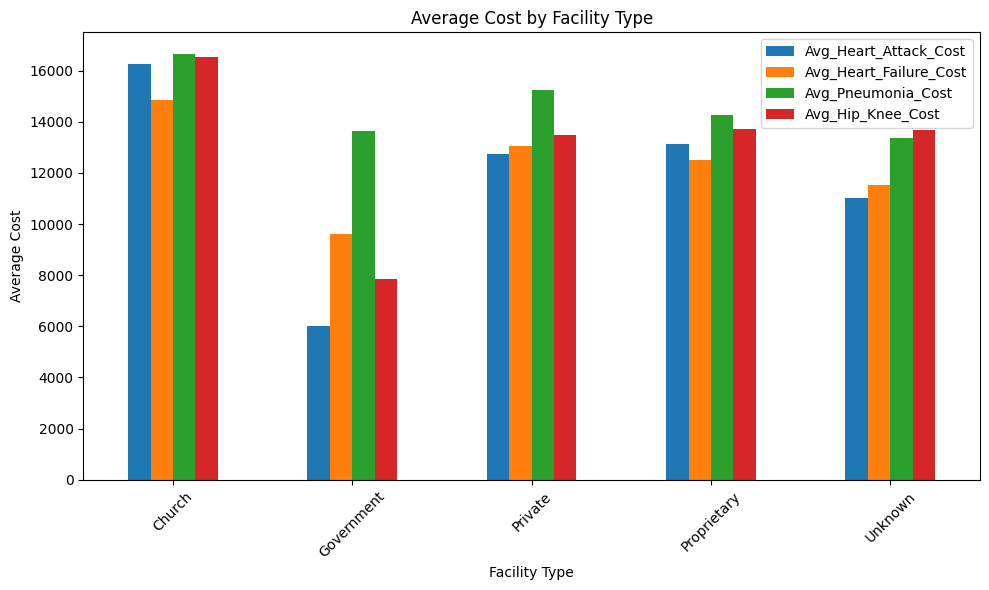

In [53]:
import matplotlib.pyplot as plt

# Plotting average costs
avg_cost_by_type_df.plot(kind='bar', x='Facility.Type', figsize=(10, 6))
plt.title('Average Cost by Facility Type')
plt.ylabel('Average Cost')
plt.xlabel('Facility Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-54-27703e475244>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating.Overall', y='Facility.Name', data=high_ratings_df, ax=ax[0], palette='viridis')
<ipython-input-54-27703e475244>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating.Overall', y='Facility.Name', data=low_ratings_df, ax=ax[1], palette='viridis')


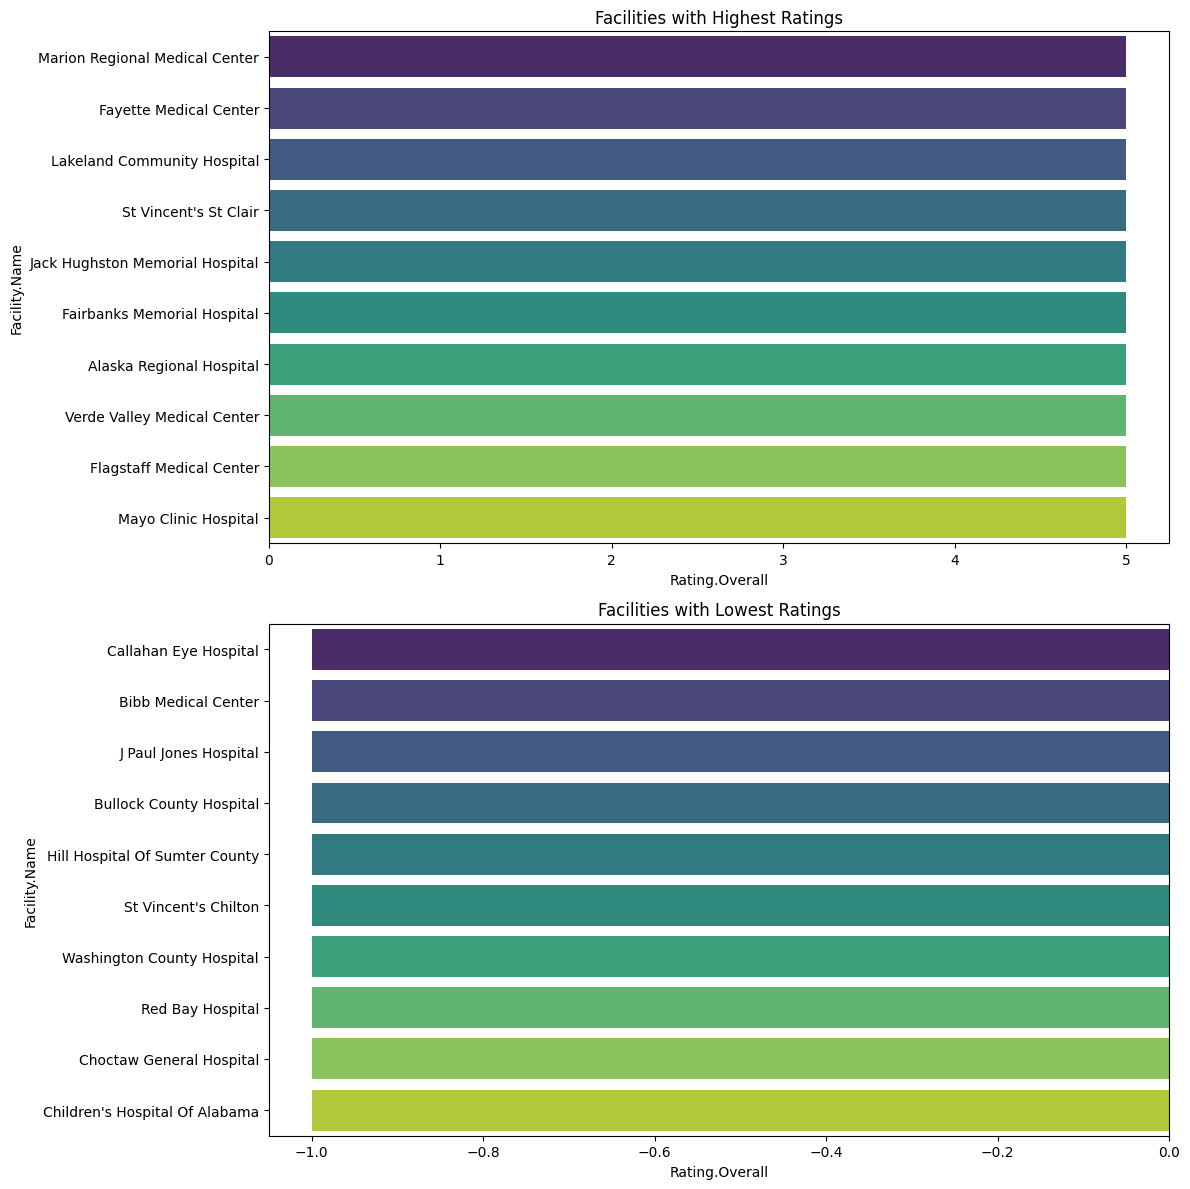

In [54]:
import seaborn as sns

# Highest and Lowest Ratings
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

sns.barplot(x='Rating.Overall', y='Facility.Name', data=high_ratings_df, ax=ax[0], palette='viridis')
ax[0].set_title('Facilities with Highest Ratings')

sns.barplot(x='Rating.Overall', y='Facility.Name', data=low_ratings_df, ax=ax[1], palette='viridis')
ax[1].set_title('Facilities with Lowest Ratings')

plt.tight_layout()
plt.show()
